In [1]:
import os
import pandas as pd
import numpy as np

import pylab as plt
import statistics
import scipy.stats

In [2]:
wkdir ="/Users/lidiayung/project/resource/perturbations/00_outputs_2020_"
os.chdir(wkdir)

In [3]:
data_year = "2020"
cell_name = "CAL29"
task = "task"

data_dir = os.path.join("00_outputs_" + data_year + "_" + cell_name)

out_dir = "00_plots_" + data_year + "_" + cell_name + "_" + task
os.makedirs(out_dir, exist_ok = True)

## Data_norm

In [4]:
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)

exp_id_list = Data_norm.index.to_list()
print("Experiments in LINCS data for " + cell_name + " cells:", len(exp_id_list), exp_id_list)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_CAL29_24H:A03,-0.080008,0.299000,-0.358535,0.607407,0.273957,-0.342600,0.485377,0.194704,0.127850,-0.124635,...,0.796081,0.527034,-0.923981,-0.914088,-0.130942,-0.646923,-0.512850,0.228304,0.214569,0.365473
ASG002_CAL29_24H:A04,-0.328507,0.145749,-0.088684,-0.133493,-0.053592,0.022400,0.081677,-0.389596,-0.042950,0.124016,...,0.561081,0.181935,0.395420,-0.736189,0.043908,0.600277,0.065350,0.207504,-0.078031,0.359373
ASG002_CAL29_24H:A05,-0.094208,0.111500,1.150316,0.198558,0.155808,-0.164900,0.076427,0.271704,0.193250,0.199615,...,0.141381,-0.094615,0.395119,-1.137388,0.046408,-0.970223,-0.218301,0.343904,-0.209031,-0.378327
ASG002_CAL29_24H:A06,-0.328857,0.200950,1.132116,-0.001092,0.050158,-0.239000,-0.084523,-0.675446,-0.188350,-0.258985,...,-0.725219,-0.334565,0.515119,-1.421788,-0.088892,0.345577,0.091350,-0.014446,0.251569,0.299674
ASG002_CAL29_24H:J13,0.384643,-0.083000,0.674916,-0.336792,0.453207,-0.029100,-0.169523,-0.452997,0.201750,0.177415,...,-0.578620,0.041284,-0.987181,0.581712,-0.168792,2.835777,0.036550,-0.308546,-0.473731,0.067973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_CAL29_24H:P20,0.720000,0.089350,0.012950,-0.500700,0.337650,0.316625,0.299450,-0.705950,0.975199,-0.910450,...,-0.963500,-0.261600,1.784900,-0.120050,-0.014525,1.182849,0.200700,-0.805175,0.311750,-0.539150
MOAR012_CAL29_24H:P21,0.228000,0.163050,0.878400,0.325050,0.363550,-0.015475,-0.047050,-1.016950,0.911200,-0.180750,...,-0.806199,-0.280700,-0.057600,0.419049,0.086025,-0.730350,-0.054000,-0.219225,-0.068200,-0.620500
MOAR012_CAL29_24H:P22,1.011800,-0.041500,-0.527250,-0.282749,0.222350,0.847425,0.118650,0.719150,0.086600,-0.913651,...,-0.483850,-0.268950,0.182800,-0.475250,0.152575,-0.222650,0.165400,-0.000625,0.029600,-0.893850
MOAR012_CAL29_24H:P23,0.460600,-0.018550,-0.058700,-0.151549,0.265350,0.616323,0.253850,0.040050,0.322900,-0.266550,...,-0.682250,-0.032701,-0.262151,0.196850,0.215825,-0.714250,0.070750,-0.597925,-0.226200,-0.002400


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

In [61]:
#gl.columns=['gene

In [63]:
gl.to_csv("gl_lincs.csv")

## Sig_info

In [5]:
data_file = os.path.join(data_dir, "sig_info_" + data_year + "_" + cell_name+ ".xlsx")
sig_info_cell_df = pd.read_excel(data_file, index_col = 0).fillna("")
display(sig_info_cell_df)

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
ASG002_CAL29_24H:A03,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:A03,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_CAL29_24H:A04,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:A04,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_CAL29_24H:A05,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:A05,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_CAL29_24H:A06,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:A06,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_CAL29_24H:J13,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:J13,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_CAL29_24H:P20,CAL29,MOAR012,24 h,MOAR012_CAL29_24H_X1_B35:P20,1,trt_cp,BAY-61-3606,,0,3.33 uM,3.33
MOAR012_CAL29_24H:P21,CAL29,MOAR012,24 h,MOAR012_CAL29_24H_X1_B35:P21,1,trt_cp,BAY-61-3606,,0,1.11 uM,1.11
MOAR012_CAL29_24H:P22,CAL29,MOAR012,24 h,MOAR012_CAL29_24H_X1_B35:P22,1,trt_cp,ethaverine,,0,10 uM,10.00


## Input_info - ALL_DATA (modules, STV)

In [66]:
#data_file = "ALL_DATA_" + data_year + "_" + task + ".xlsx"
data_file = "/Users/lidiayung/project/resource/perturbations/ALL_DATA_2020_Martin_2.xlsx"
modules = pd.read_excel(data_file, sheet_name = "modules", index_col = 0)
display(modules)

""
Module
CDK1
CDK2
PAK
PI3K
ERK
BET
Aurora
TGFbR
VEGFR


## STV (State Transition Vectors)

In [6]:
#data_file = "ALL_DATA_" + data_year + "_" + task + ".xlsx" 
data_file="/Users/lidiayung/project/resource/perturbations/blca_tcga_pan_can_atlas_2018/II_IV_survival_coeffs_glmnet.csv"
STVs = pd.read_csv(data_file,index_col = 0)
display(STVs)

states = STVs.columns.to_list()
print("States:", states)

,x
ABCB6,-3.102998
ABCF1,-1.028343
ABHD4,1.145963
ABHD6,-0.728771
ACD,0.000039
...,...
ORC1L,-2.041749
GXYLT1,-2.358302
SQRDL,2.503132
TOMM70A,-0.662910


States: ['x']


In [92]:
STVs.reset_index(inplace=True)

In [94]:
STVs.columns=['RNA_filt','state']

In [95]:
STVs

,RNA_filt,state
0,ABCB6,-3.102998
1,ABCF1,-1.028343
2,ABHD4,1.145963
3,ABHD6,-0.728771
4,ACD,0.000039
...,...,...
304,ORC1L,-2.041749
305,GXYLT1,-2.358302
306,SQRDL,2.503132
307,TOMM70A,-0.662910


In [88]:
missing_genes = pd.read_csv("/Users/lidiayung/Downloads/gene_missing.csv",sep=';')


In [89]:
missing_genes

,RNA_filt,LINCs
0,ADGRE5,CD97
1,ADGRG1,GPR56
2,B4GAT1,NaN
3,C2CD5,KIAA0528
4,CAMSAP2,CKAP4
5,CARMIL1,RLTPR
6,CCP110,CEP110
7,CEMIP2,KIAA1199
8,CHP1,CHP
9,CIAO3,NARFL


In [96]:
joined_df = STVs.merge(missing_genes,on='RNA_filt',how='left')

In [99]:
joined_df['LINCs'] = joined_df['LINCs'].fillna(joined_df['RNA_filt'])


In [100]:
joined_df

,RNA_filt,state,LINCs
0,ABCB6,-3.102998,ABCB6
1,ABCF1,-1.028343,ABCF1
2,ABHD4,1.145963,ABHD4
3,ABHD6,-0.728771,ABHD6
4,ACD,0.000039,ACD
...,...,...,...
304,ORC1L,-2.041749,ORC1L
305,GXYLT1,-2.358302,GXYLT1
306,SQRDL,2.503132,SQRDL
307,TOMM70A,-0.662910,TOMM70A


In [103]:
joined_df.drop(columns=['RNA_filt'],inplace=True)

In [132]:
joined_df[joined_df['LINCs']=='KIAA0196']

,state,LINCs
308,-1.204719,KIAA0196


In [122]:
STVs=joined_df[['LINCs','state']]

In [124]:
STVs[STVs['LINCs']=='CHP']

,LINCs,state
295,CHP,0.430228


In [128]:
STVs.columns=['Gene','state']

In [129]:
STVs.set_index('Gene',inplace=True)

In [134]:
STVs

,state
Gene,
ABCB6,-3.102998
ABCF1,-1.028343
ABHD4,1.145963
ABHD6,-0.728771
ACD,0.000039
...,...
ORC1L,-2.041749
GXYLT1,-2.358302
SQRDL,2.503132


In [175]:
STV_df = pd.DataFrame(
    np.zeros((len(genes_list), 1)), 
    index = genes_list, 
    columns = states)


In [176]:
STVs

,state
Gene,
ABCB6,-3.102998
ABCF1,-1.028343
ABHD4,1.145963
ABHD6,-0.728771
ACD,0.000039
...,...
ORC1L,-2.041749
GXYLT1,-2.358302
SQRDL,2.503132


In [178]:
STV_df=STV_df.merge(STVs,left_index=True, right_index=True, how='left')

In [179]:
STV_df

,state_x,state_y
AARS,0.0,NaN
ABCB6,0.0,-3.102998
ABCC5,0.0,NaN
ABCF1,0.0,-1.028343
ABCF3,0.0,NaN
...,...,...
ZNF395,0.0,NaN
ZNF451,0.0,NaN
ZNF586,0.0,0.442255
ZNF589,0.0,NaN


In [180]:
STV_df['state'] = STV_df['state_y'].fillna(STV_df['state_x'])

In [182]:
STV_df=STV_df.drop(columns=['state_x','state_y'])

In [183]:
STV_df

,state
AARS,0.000000
ABCB6,-3.102998
ABCC5,0.000000
ABCF1,-1.028343
ABCF3,0.000000
...,...
ZNF395,0.000000
ZNF451,0.000000
ZNF586,0.442255
ZNF589,0.000000


In [184]:

states = STV_df.columns.to_list()
print("States:", states)

States: ['state']


## DPD calculating

In [185]:
DPD_df = pd.DataFrame(
    np.zeros((len(exp_id_list), 1)),
    index = exp_id_list,
    columns = states,
)

In [159]:
for exp_id in DPD_df.index:
    print(exp_id)

ASG002_BC3C_24H:A03
ASG002_BC3C_24H:A04
ASG002_BC3C_24H:A05
ASG002_BC3C_24H:A06
ASG002_BC3C_24H:J13
ASG002_BC3C_24H:J14
ASG002_BC3C_24H:J15
ASG002_BC3C_24H:J16
ASG002_BC3C_24H:J17
ASG002_BC3C_24H:J18
ASG002_BC3C_24H:O04
ASG002_BC3C_24H:O05
ASG002_BC3C_24H:O06
MOAR008_BC3C_24H:A03
MOAR008_BC3C_24H:B03
MOAR009_BC3C_24H:A03
MOAR009_BC3C_24H:B03
MOAR010_BC3C_24H:A03
MOAR010_BC3C_24H:B03
MOAR010_BC3C_24H:C22
MOAR010_BC3C_24H:C23
MOAR010_BC3C_24H:C24
MOAR010_BC3C_24H:G16
MOAR010_BC3C_24H:G17
MOAR010_BC3C_24H:G18
MOAR010_BC3C_24H:K10
MOAR010_BC3C_24H:K11
MOAR010_BC3C_24H:K12
MOAR010_BC3C_24H:O04
MOAR010_BC3C_24H:O05
MOAR010_BC3C_24H:O06
MOAR011_BC3C_24H:A03
MOAR011_BC3C_24H:B03
MOAR012_BC3C_24H:A03
MOAR012_BC3C_24H:B03
ASG002_BC3C_24H:A07
ASG002_BC3C_24H:A08
ASG002_BC3C_24H:A09
ASG002_BC3C_24H:A10
ASG002_BC3C_24H:A11
ASG002_BC3C_24H:A13
ASG002_BC3C_24H:A14
ASG002_BC3C_24H:A15
ASG002_BC3C_24H:A16
ASG002_BC3C_24H:A17
ASG002_BC3C_24H:A18
ASG002_BC3C_24H:A19
ASG002_BC3C_24H:A20
ASG002_BC3C_24H:A2

In [187]:
Data_norm

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.543203,0.494266,-0.011923,-0.225931,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,-0.565096,-0.088634,0.122977,-0.047931,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,0.226104,-0.228034,-0.121023,-0.075331,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.608596,-0.228835,0.072777,0.082970,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.318397,0.122265,-0.134323,-0.088931,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,-1.598475,-0.552750,0.515151,0.120800,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-1.650575,0.203600,-0.003250,-0.064800,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.127625,0.031600,0.103250,-0.249600,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.054676,-0.596050,0.084600,0.444700,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700


In [190]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, state] = np.dot(Data_norm.loc[exp_id], STV_df['state'])

display(DPD_df)

,state,x
ASG002_BC3C_24H:A03,0.0,-1.821651
ASG002_BC3C_24H:A04,0.0,-4.980641
ASG002_BC3C_24H:A05,0.0,-4.741628
ASG002_BC3C_24H:A06,0.0,-10.823825
ASG002_BC3C_24H:J13,0.0,3.448001
...,...,...
MOAR012_BC3C_24H:P20,0.0,-0.875335
MOAR012_BC3C_24H:P21,0.0,-0.303072
MOAR012_BC3C_24H:P22,0.0,1.178472
MOAR012_BC3C_24H:P23,0.0,-13.907536


In [192]:
DPD_inf_df = pd.concat([
                            DPD_df,
                            sig_info_cell_df.loc[DPD_df.index, ["pert_drug", "targets", "dose"]]
                            ], axis = 1)

display(DPD_inf_df)

,state,x,pert_drug,targets,dose
ASG002_BC3C_24H:A03,0.0,-1.821651,DMSO,DMSO_No_target,0 uM
ASG002_BC3C_24H:A04,0.0,-4.980641,DMSO,DMSO_No_target,0 uM
ASG002_BC3C_24H:A05,0.0,-4.741628,DMSO,DMSO_No_target,0 uM
ASG002_BC3C_24H:A06,0.0,-10.823825,DMSO,DMSO_No_target,0 uM
ASG002_BC3C_24H:J13,0.0,3.448001,DMSO,DMSO_No_target,0 uM
...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.0,-0.875335,BAY-61-3606,,3.33 uM
MOAR012_BC3C_24H:P21,0.0,-0.303072,BAY-61-3606,,1.11 uM
MOAR012_BC3C_24H:P22,0.0,1.178472,ethaverine,,10 uM
MOAR012_BC3C_24H:P23,0.0,-13.907536,ethaverine,,3.33 uM


In [193]:
DPD_inf_df.to_excel(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".xlsx"))
DPD_inf_df.to_csv(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".csv"))

In [16]:
DPD_df = pd.read_csv('/Users/lidiayung/project/resource/perturbations/00_plots_2020_CAL29_/DPD_2020_CAL29_Jing_1.csv',index_col=0)

In [10]:
DPD_inf_df

,x,pert_drug,targets,dose
ASG002_CAL29_24H:A03,-17.309628,DMSO,DMSO_No_target,0 uM
ASG002_CAL29_24H:A04,-0.357113,DMSO,DMSO_No_target,0 uM
ASG002_CAL29_24H:A05,-8.714659,DMSO,DMSO_No_target,0 uM
ASG002_CAL29_24H:A06,1.990987,DMSO,DMSO_No_target,0 uM
ASG002_CAL29_24H:J13,-0.871136,DMSO,DMSO_No_target,0 uM
...,...,...,...,...
MOAR012_CAL29_24H:P20,13.169364,BAY-61-3606,NaN,3.33 uM
MOAR012_CAL29_24H:P21,6.816824,BAY-61-3606,NaN,1.11 uM
MOAR012_CAL29_24H:P22,15.989828,ethaverine,NaN,10 uM
MOAR012_CAL29_24H:P23,7.192087,ethaverine,NaN,3.33 uM


## Analisys of DPD values to find targets

In [194]:
i = 0
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,state,x,pert_drug,targets,dose
ASG002_BC3C_24H:A03,0.0,-1.821651,DMSO,DMSO_No_target,0 uM
MOAR010_BC3C_24H:K01,0.0,-2.333325,CFM-2,,10 uM
MOAR010_BC3C_24H:J24,0.0,4.271345,serdemetan,MDM2,1.11 uM
MOAR010_BC3C_24H:J23,0.0,-3.728666,serdemetan,MDM2,3.33 uM
MOAR010_BC3C_24H:J22,0.0,-3.571538,serdemetan,MDM2,10 uM
MOAR010_BC3C_24H:J21,0.0,1.309992,vernakalant,KCNA5,1.11 uM
MOAR010_BC3C_24H:J20,0.0,14.112106,vernakalant,KCNA5,3.33 uM
MOAR010_BC3C_24H:J19,0.0,5.050501,vernakalant,KCNA5,10 uM
MOAR010_BC3C_24H:J18,0.0,13.040055,acetylsalicylsalicylic-acid,,1.11 uM
MOAR010_BC3C_24H:J17,0.0,2.541113,acetylsalicylsalicylic-acid,,3.33 uM


Targets: 7 ['', 'ACE', 'ADORA1', 'DMSO_No_target', 'GABRA1, GABRA2, GABRA3, GABRA4, GABRA5, GABRA6, GABRB1, GABRB2, GABRB3, GABRD, GABRE, GABRG1, GABRG2, GABRG3, GABRP, GABRQ, GLRA1', 'KCNA5', 'MDM2']


In [196]:
i = 0  # Index of the state, assuming it's the first (index 0)
top = 10

DPD_analysis = pd.concat([
    DPD_inf_df.sort_values(by=states[i])[:top],
    DPD_inf_df.sort_values(by=states[i])[len(DPD_inf_df.index) - top:]
], axis=0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))


,state,x,pert_drug,targets,dose
ASG002_BC3C_24H:A03,0.0,-1.821651,DMSO,DMSO_No_target,0 uM
MOAR010_BC3C_24H:K01,0.0,-2.333325,CFM-2,,10 uM
MOAR010_BC3C_24H:J24,0.0,4.271345,serdemetan,MDM2,1.11 uM
MOAR010_BC3C_24H:J23,0.0,-3.728666,serdemetan,MDM2,3.33 uM
MOAR010_BC3C_24H:J22,0.0,-3.571538,serdemetan,MDM2,10 uM
MOAR010_BC3C_24H:J21,0.0,1.309992,vernakalant,KCNA5,1.11 uM
MOAR010_BC3C_24H:J20,0.0,14.112106,vernakalant,KCNA5,3.33 uM
MOAR010_BC3C_24H:J19,0.0,5.050501,vernakalant,KCNA5,10 uM
MOAR010_BC3C_24H:J18,0.0,13.040055,acetylsalicylsalicylic-acid,,1.11 uM
MOAR010_BC3C_24H:J17,0.0,2.541113,acetylsalicylsalicylic-acid,,3.33 uM


Targets: 7 ['', 'ACE', 'ADORA1', 'DMSO_No_target', 'GABRA1, GABRA2, GABRA3, GABRA4, GABRA5, GABRA6, GABRB1, GABRB2, GABRB3, GABRD, GABRE, GABRG1, GABRG2, GABRG3, GABRP, GABRQ, GLRA1', 'KCNA5', 'MDM2']


In [18]:
i = 2
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,FSS,remod,OSS,pert_drug,targets,dose
ASG002_BC3C_24H:K11,1.049030,-0.330734,-10.021531,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
ASG002_BC3C_24H:K10,-0.468206,0.018062,-9.990368,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
ASG002_BC3C_24H:K07,1.216133,-0.053251,-9.215881,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
ASG002_BC3C_24H:K09,1.003448,0.486974,-8.700508,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
ASG002_BC3C_24H:K12,0.244982,0.542368,-8.690436,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
ASG002_BC3C_24H:C21,1.587780,-0.125637,-7.732547,MG-132,PSMB1,20 uM
ASG002_BC3C_24H:C20,1.437925,-1.020522,-7.582102,MG-132,PSMB1,20 uM
ASG002_BC3C_24H:H22,2.208284,-1.684621,-7.368529,YM-155,BIRC5,10 uM
ASG002_BC3C_24H:P13,1.721431,0.124388,-7.327950,ixazomib,PSMB1,10 uM
ASG002_BC3C_24H:A13,0.922650,-3.175784,-7.229726,TW-37,"BCL2, BCL2L1, MCL1",10 uM


Targets: 11 ['', 'ABL1, BCR, FGFR1, FGFR2, FGFR3, FGFR4, FLT3, KIT, RET, TEK', 'BCL2, BCL2L1, MCL1', 'BIRC5', 'CACNA1B, SV2A', 'CACNA1C, CACNA1D, CACNA1F, CACNA1S, NR3C2', 'GABRA1, GABRA2, GABRA3, GABRA4, GABRA5, GABRA6, GABRB1, GABRB2, GABRB3, GABRD, GABRE, GABRG1, GABRG2, GABRG3, GABRP, GABRQ', 'PSMB1', 'PSMB1, PSMB2, PSMB5', 'RARA', 'TSPO']


In [19]:
### copy manually
targets_list = ["ATP4A", "AVPR1A", "CYSLTR1", "CYSLTR2", "ESR1", "ESR2", "FKBP1A", "MTOR", "IDH1", "MAOA", "NFE2L2", "OPRD1", "OPRK1", "OPRM1", "PSMB1", "PSMB1", "PSMB2", "PSMB5", "PTGS1", "PTGS2", "ADRB2", "DRD1", "DRD2", "HRH1", "HTR1A", "HTR1B", "HTR2A", "AURKA", "AURKB", "FGFR1", "FGFR2", "KDR", "PDGFRA", "PDGFRB", "CYP2C19", "CYP2C9", "CYP3A4", "CYP3A5", "PTGS1", "DHODH", "ESR1", "GNRHR", "FKBP1A", "MTOR", "HDAC1", "HDAC2", "HDAC3", "HDAC6", "HDAC8", "MET", "MMUT", "PDE4D", "PSMB1", "PSMB2", "PSMB5", "PTGS1", "PTGS2", "SLC6A2", "AOC1", "ATP4A", "CDK2", "CDK7", "CDK9", "CHRM1", "DRD2", "HTR2A", "FFAR1", "PDE11A", "PDE5A", "PPARG", "PSMB1", "PSMB1", "PSMB2", "PSMB5"]
targets_list = sorted(list(set(targets_list )))
print("Targets:", len(targets_list ), targets_list) 

Targets: 57 ['ADRB2', 'AOC1', 'ATP4A', 'AURKA', 'AURKB', 'AVPR1A', 'CDK2', 'CDK7', 'CDK9', 'CHRM1', 'CYP2C19', 'CYP2C9', 'CYP3A4', 'CYP3A5', 'CYSLTR1', 'CYSLTR2', 'DHODH', 'DRD1', 'DRD2', 'ESR1', 'ESR2', 'FFAR1', 'FGFR1', 'FGFR2', 'FKBP1A', 'GNRHR', 'HDAC1', 'HDAC2', 'HDAC3', 'HDAC6', 'HDAC8', 'HRH1', 'HTR1A', 'HTR1B', 'HTR2A', 'IDH1', 'KDR', 'MAOA', 'MET', 'MMUT', 'MTOR', 'NFE2L2', 'OPRD1', 'OPRK1', 'OPRM1', 'PDE11A', 'PDE4D', 'PDE5A', 'PDGFRA', 'PDGFRB', 'PPARG', 'PSMB1', 'PSMB2', 'PSMB5', 'PTGS1', 'PTGS2', 'SLC6A2']


## Plots for targets

In [197]:
print_drugs = []

### CDK1/2

In [11]:
target_name = "PI3K"

target = "PI3K"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "mTOR"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target PI3K: 0 []


In [199]:
drugs_list = drugs + ["OTS-167", "PHA-767491"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
JNJ-7706621,"AURKA, AURKB, CDK1, CDK2","0.12 uM, 1.11 uM, 10 uM"
PHA-793887,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.12 uM, 1.11 uM, 10 uM"
roscovitine,"CDK2, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"
OTS-167,,
PHA-767491,,


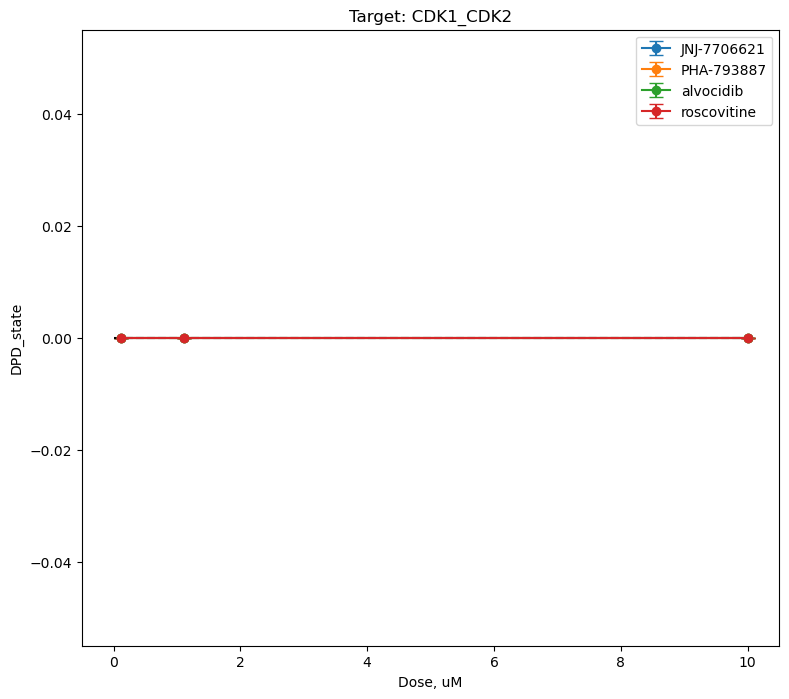

In [200]:
target_name = "CDK1_CDK2"
#target_drugs = ["CGP-60474", "dinaciclib", "roscovitine", "OTS-167", "PHA-767491"]
target_drugs=['JNJ-7706621', 'PHA-793887', 'alvocidib', 'roscovitine']
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [21]:
# delete OTS-167
print_drugs += ["CGP-60474", "dinaciclib", "PHA-767491", "roscovitine"]

In [22]:
# delete for roscovitine dose 3,33 uM
labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == "roscovitine") & (sig_info_cell_df.dose_float == 3.33)].index.to_list()
print(labels)

['REP.A011_HUVEC.A_24H:O08']


### PAK

In [13]:
target = "PIK3"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PIK3: 6 ['AS-605240', 'GDC-0349', 'LY-294002', 'NVP-BEZ235', 'PI-103', 'taselisib']


In [14]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AS-605240,PIK3CG,"0.12 uM, 1.11 uM, 10 uM"
GDC-0349,PIK3CA,"1.11 uM, 10 uM, 3.33 uM"
LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC","0.12 uM, 1.11 uM, 10 uM"
NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
PI-103,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
taselisib,PIK3CA,"0.12 uM, 1.11 uM, 10 uM"


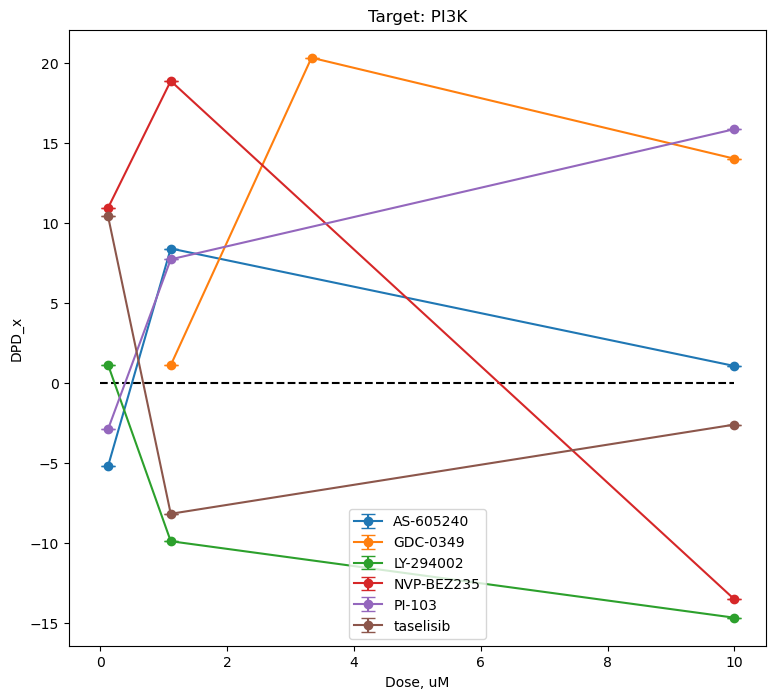

In [17]:
target_name = "PI3K"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [26]:
print_drugs += target_drugs

In [27]:
# delete for PF-03758309 dose 10 uM

labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == "PF-03758309") & (sig_info_cell_df.dose_float == 10)].index.to_list()
print(labels)

['LJP009_HUVEC.A_24H:D01', 'LJP009_HUVEC_24H:D01']


### PI3K

In [204]:
target = "PIK3"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PIK3: 6 ['AS-605240', 'GDC-0349', 'LY-294002', 'NVP-BEZ235', 'PI-103', 'taselisib']


In [205]:
drugs_list = drugs + ["GSK-2334470", "A-66", "BGT-226", "BX-795"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AS-605240,PIK3CG,"0.12 uM, 1.11 uM, 10 uM"
GDC-0349,PIK3CA,"1.11 uM, 10 uM, 3.33 uM"
LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC","0.12 uM, 1.11 uM, 10 uM"
NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
PI-103,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
taselisib,PIK3CA,"1.11 uM, 10 uM"
GSK-2334470,,
A-66,,
BGT-226,,
BX-795,,


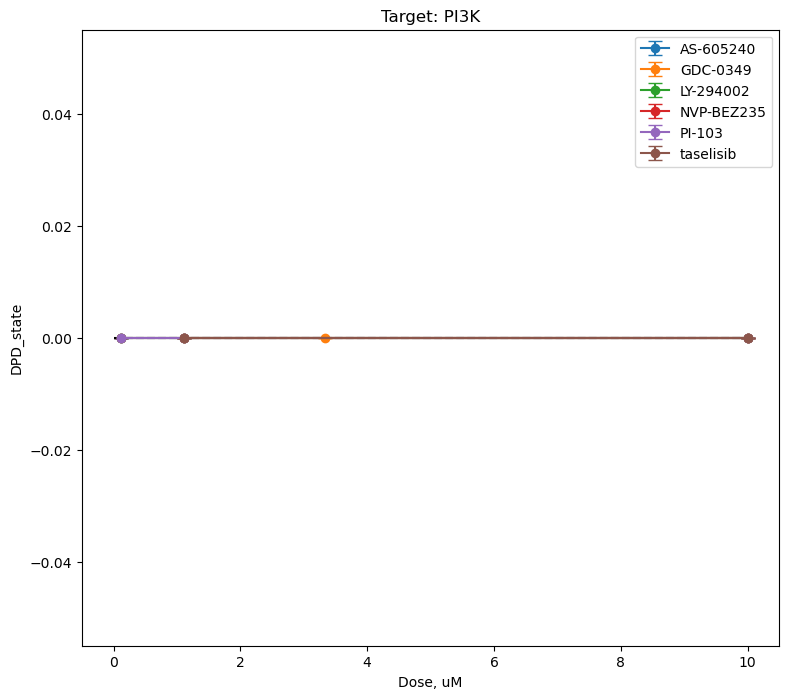

In [206]:
target_name = "PI3K"
#target_drugs = ["PF-04691502", "XL-147", "GSK-2334470", "A-66", "BGT-226", "BX-795"]
target_drugs=['AS-605240', 'GDC-0349', 'LY-294002', 'NVP-BEZ235', 'PI-103', 'taselisib']
# deleted idelalisib, quercetin because other targets = PIK3CD, PIK3CG (delta, gamma, we use only alpha)


for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [31]:
print_drugs += target_drugs

### ERK

In [28]:
target_name = "ERK"

target = "MAP2K"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "MAPK"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "RAF"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target ERK: 7 ['AZ-628', 'PD-0325901', 'dabrafenib', 'selumetinib', 'sorafenib', 'trametinib', 'vemurafenib']


In [29]:
drugs_list = drugs + ["RAF-265"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AZ-628,"BRAF, RAF1","0.12 uM, 1.11 uM, 10 uM"
PD-0325901,MAP2K1,"0.12 uM, 1.11 uM, 10 uM"
dabrafenib,BRAF,"0.12 uM, 1.11 uM, 10 uM"
selumetinib,MAP2K1,"0.12 uM, 1.11 uM, 10 uM"
sorafenib,"BRAF, DDR2, FGFR1, FLT1, FLT3, FLT4, KDR, KIT,...","0.12 uM, 1.11 uM, 10 uM"
trametinib,"MAP2K1, MAP2K2","0.12 uM, 10 uM"
vemurafenib,BRAF,"0.12 uM, 1.11 uM, 10 uM"
RAF-265,,


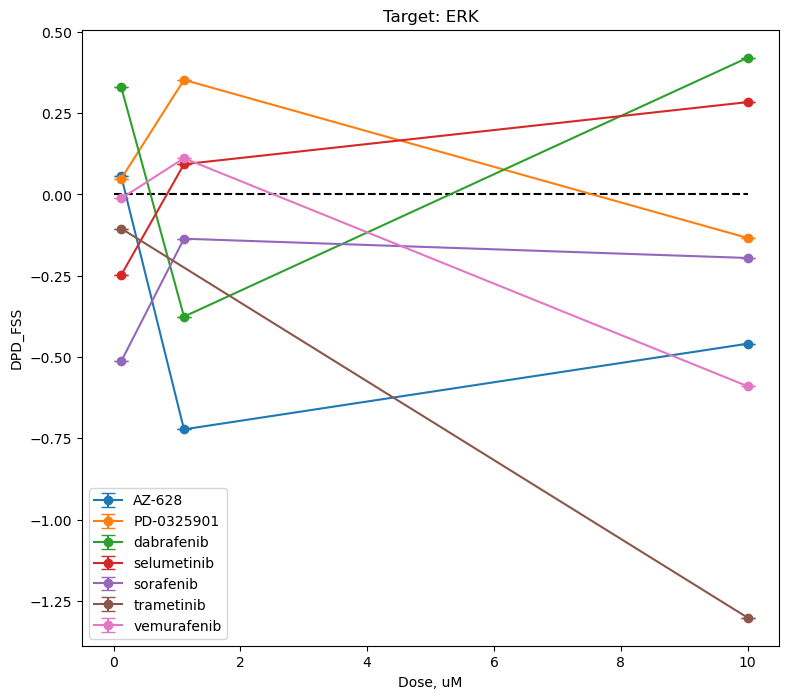

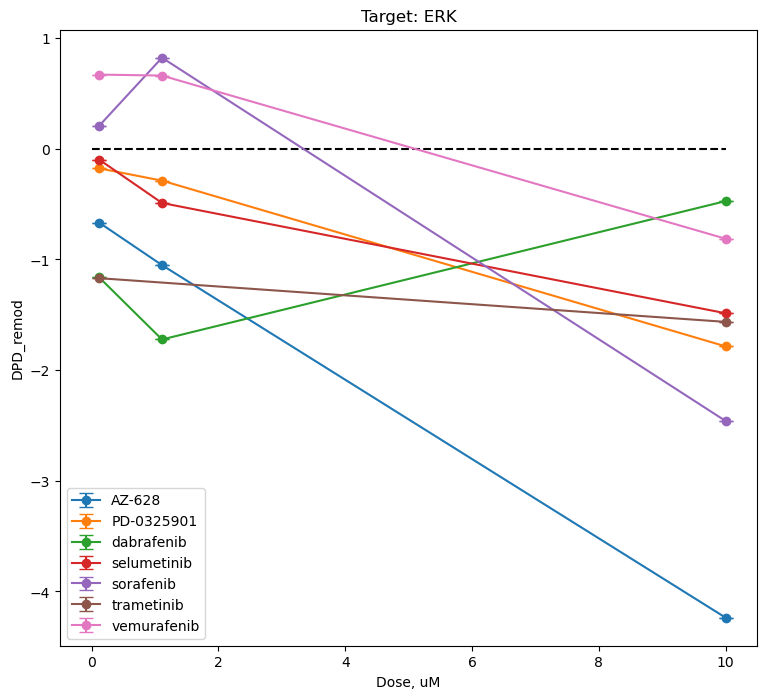

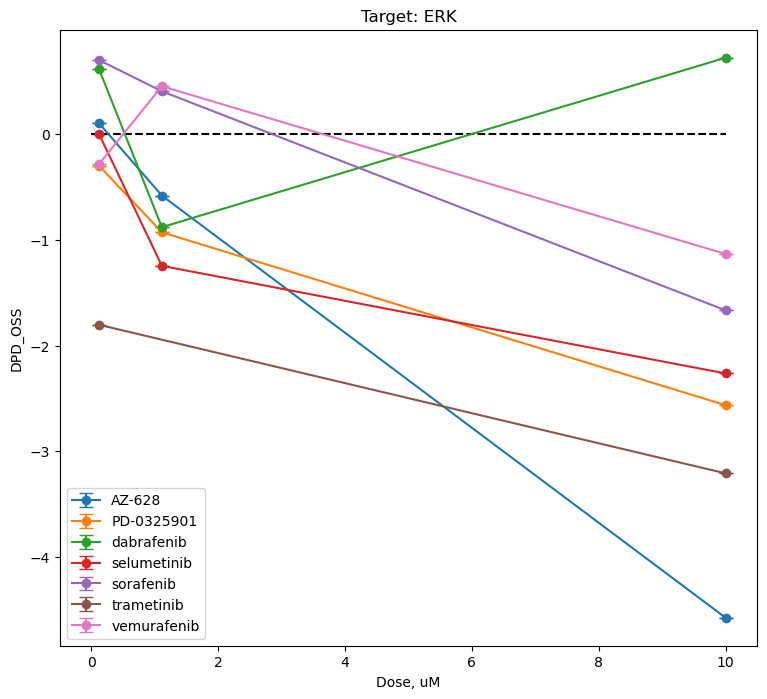

In [30]:
target_name = "ERK"
#target_drugs = ["AZ-628", "FR-180204", "GDC-0879", "GW-5074", "PD-0325901", "PD-184352", "TAK-733", "dabrafenib", "refametinib", "RAF-265"]
target_drugs=['AZ-628', 'PD-0325901', 'dabrafenib', 'selumetinib', 'sorafenib', 'trametinib', 'vemurafenib']
# deleted SB-203580 (MAPK1)
# select only gene name RAF1, BRAF, MAP2K1, MAP2K2, MAPK1, MAPK3   (Kinase pathway RAF->MEK->ERK) = module "ERK2

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [35]:
print_drugs += target_drugs

### BET

In [36]:
target = "BRD4"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target BRD4: 1 ['I-BET-762']


In [37]:
drugs_list = drugs + ["I-BET-151", "JQ-1-R", "PFI-1"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
I-BET-762,"BRD2, BRD3, BRD4","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
I-BET-151,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
JQ-1-R,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
PFI-1,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."


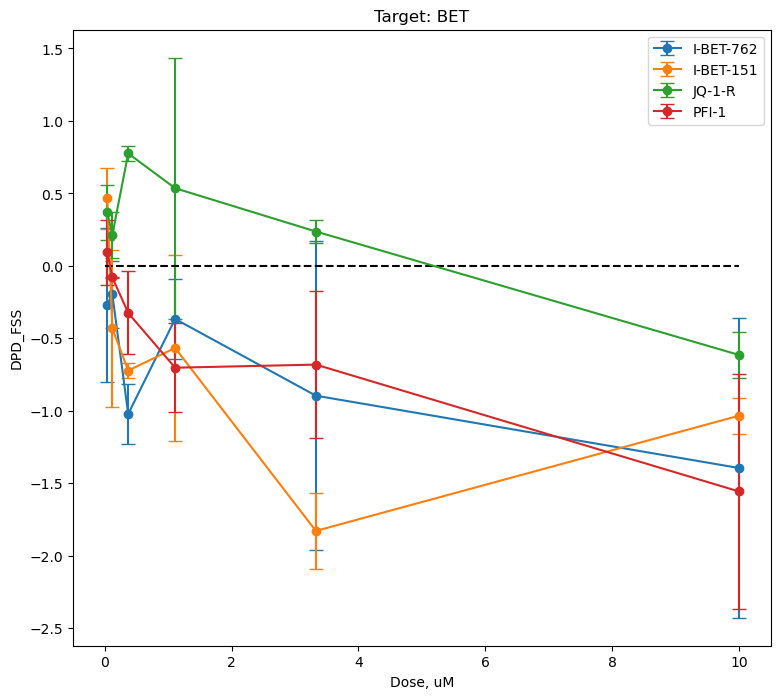

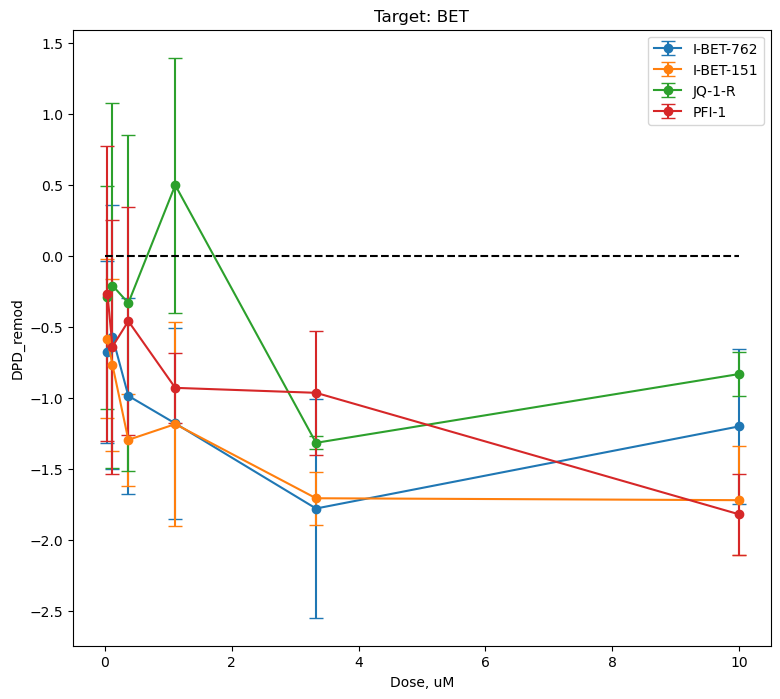

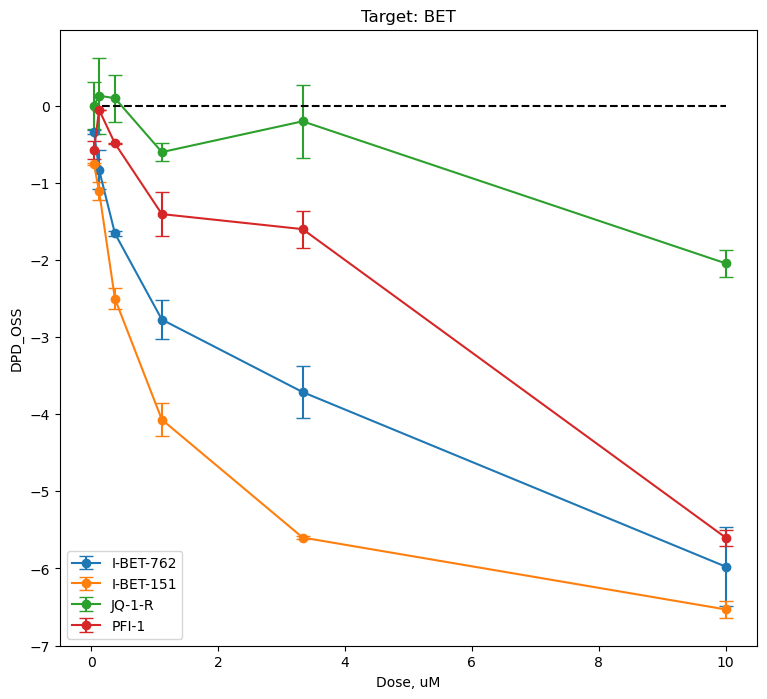

In [38]:
target_name = "BET"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [39]:
print_drugs += target_drugs

### Aurora

In [40]:
target = "AURK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target AURK: 8 ['ENMD-2076', 'GSK-1070916', 'JWE-035', 'KW-2449', 'MLN-8054', 'ZM-447439', 'alisertib', 'orantinib']


In [41]:
drugs_list = drugs + ["aurora-a-inhibitor-i"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
ENMD-2076,"AURKA, FLT3, KDR, PDGFRA, SRC","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
GSK-1070916,"AURKB, AURKC","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
JWE-035,AURKA,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
KW-2449,"ABL1, AURKA, FGFR1, FLT3","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
MLN-8054,AURKA,"0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.12 uM, 0..."
ZM-447439,"AURKA, AURKB","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
alisertib,AURKA,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
orantinib,"AURKA, AURKB, FGFR1, FGFR2, KDR, PDGFRA, PDGFRB","0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."
aurora-a-inhibitor-i,,


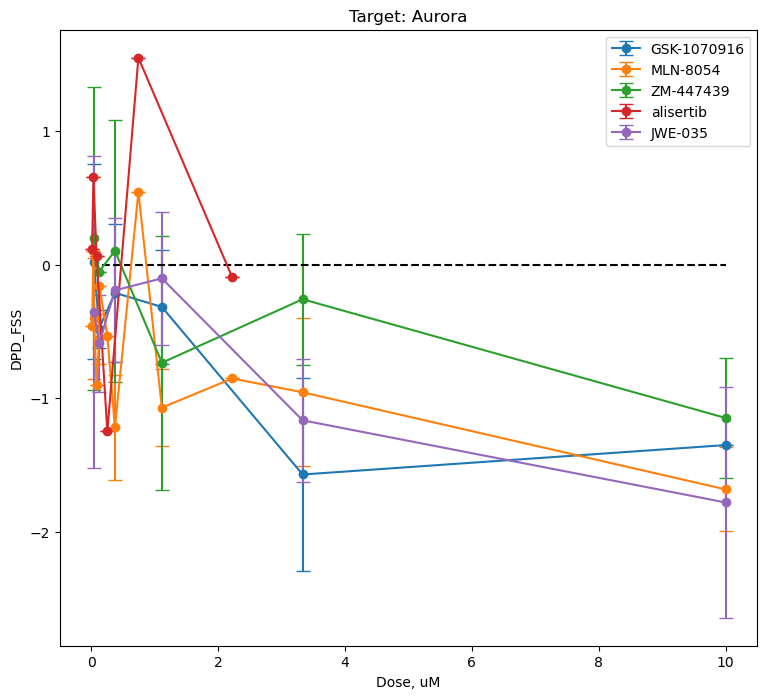

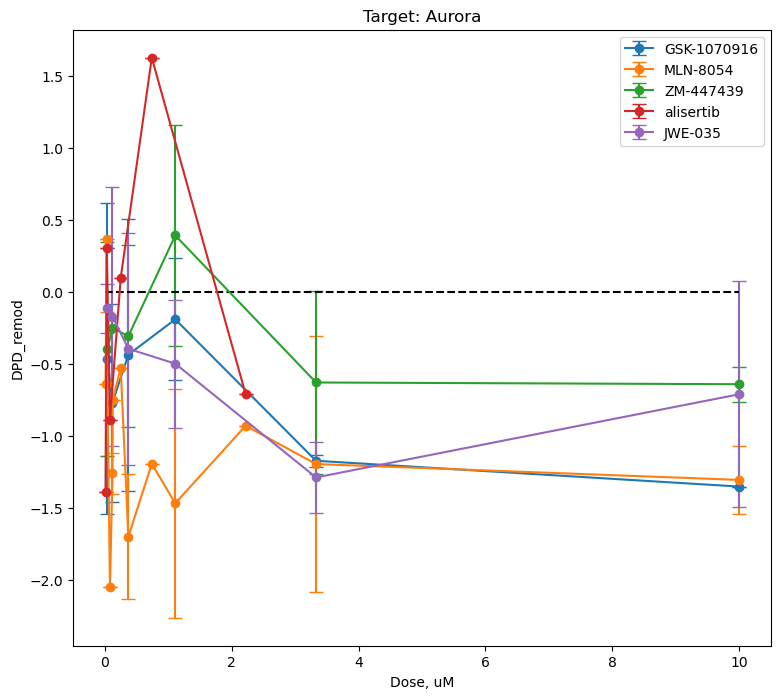

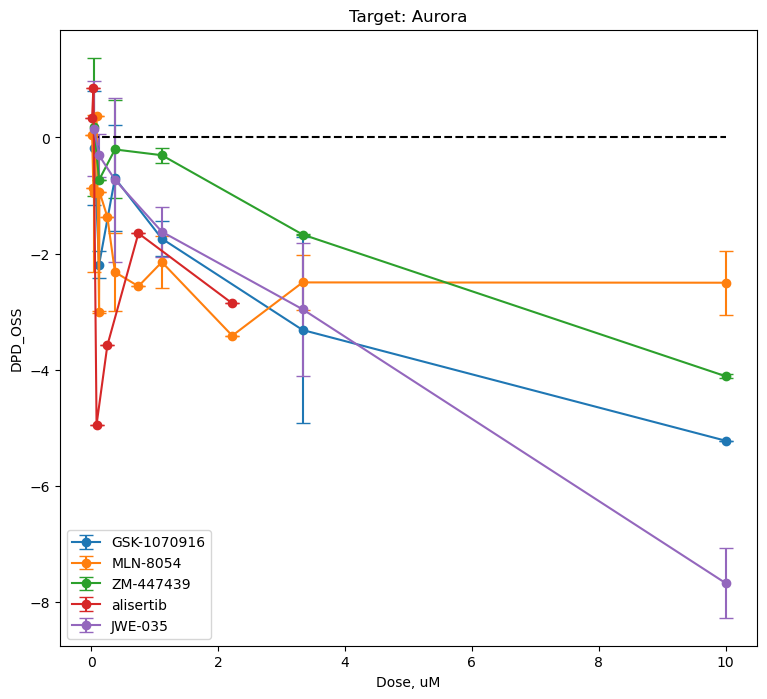

In [42]:
target_name = "Aurora"
target_drugs = ["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib", "JWE-035"]
# deleted ENMD-2076, KW-2449, orantinib because other targets 
# deleted aurora-a-inhibitor-i (2017) - not in data 2020

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [43]:
# delete JWE-035 bacause no enought info
print_drugs += ["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib"]

### TGFbR

In [44]:
target = "TGFBR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target TGFBR: 1 ['SB-525334']


In [45]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
SB-525334,TGFBR1,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."


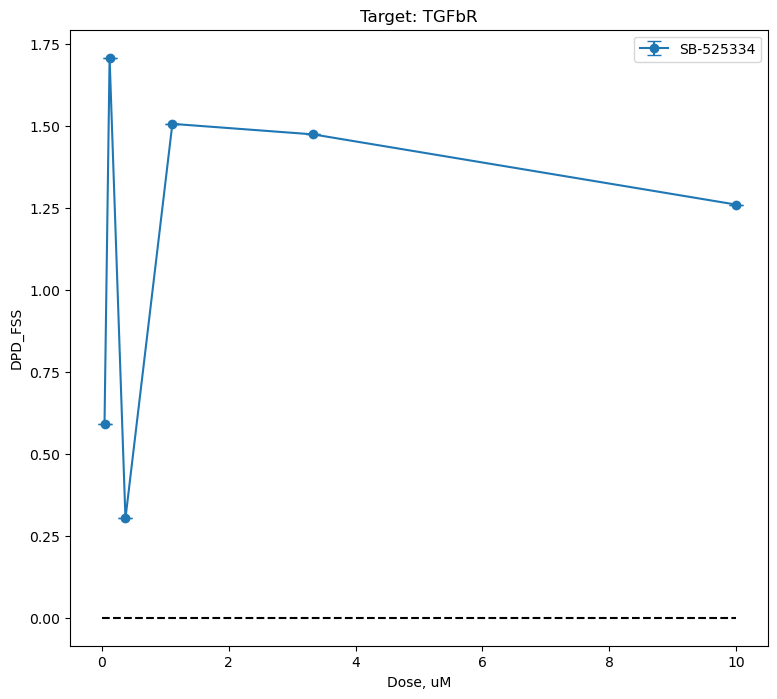

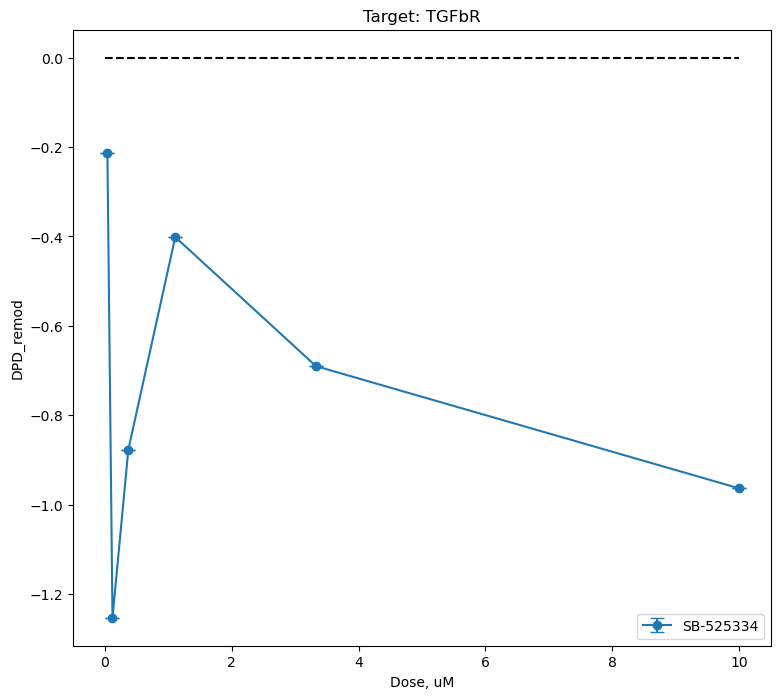

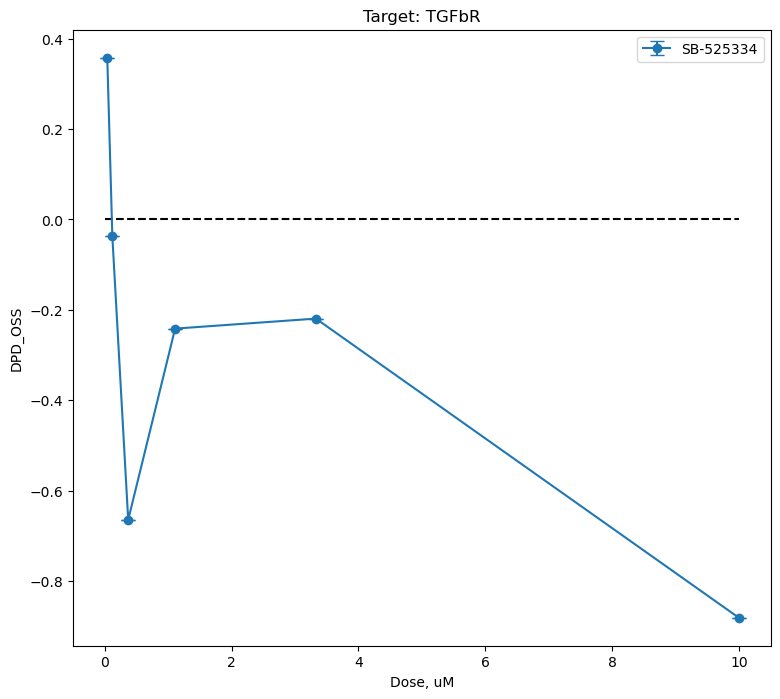

In [46]:
target_name = "TGFbR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [47]:
print_drugs += target_drugs

### VEGFR

In [48]:
drugs_list = ["rebastinib", "lenvatinib", "orantinib", "foretinib", "cediranib", "sunitinib", "tivozanib"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
rebastinib,"ABL1, BCR, FLT3, KDR, TEK","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
lenvatinib,"FGFR1, FLT1, FLT4, KDR, KIT","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
orantinib,"AURKA, AURKB, FGFR1, FGFR2, KDR, PDGFRA, PDGFRB","0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."
foretinib,"KDR, MET","0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
cediranib,"FLT1, FLT4, KDR, KIT, PDGFRB","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
sunitinib,"FLT1, FLT3, FLT4, KDR, KIT, PDGFRA, PDGFRB, RET","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
tivozanib,"FLT1, FLT4, KDR, KIT, PDGFRA, PDGFRB","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."


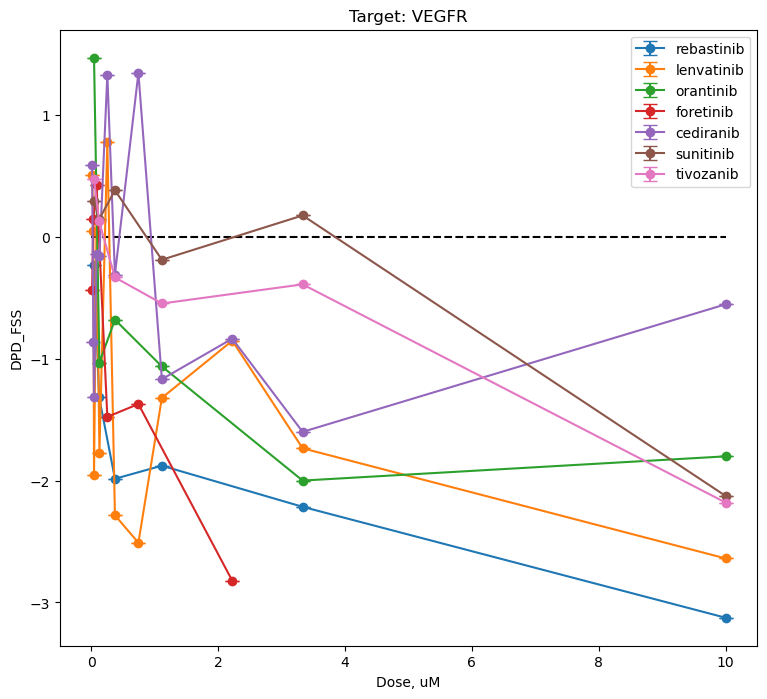

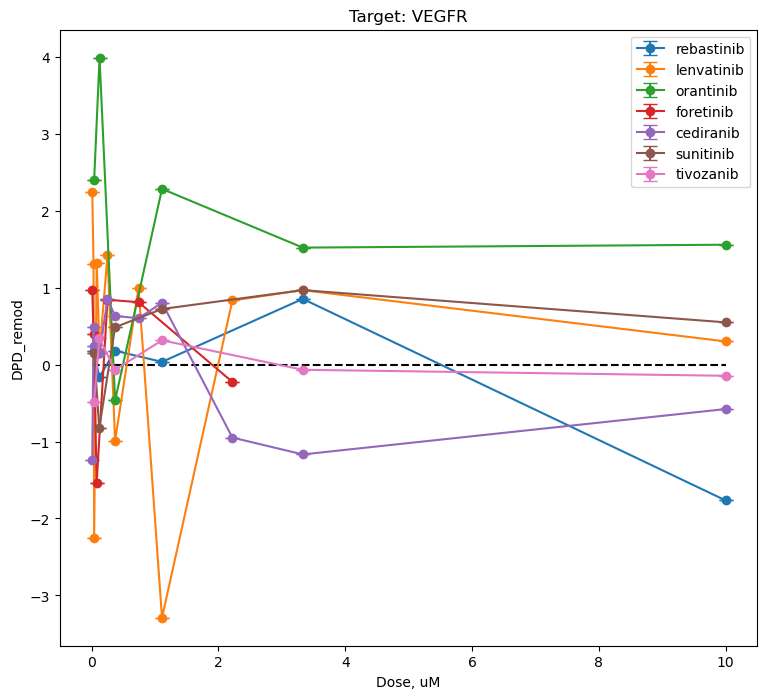

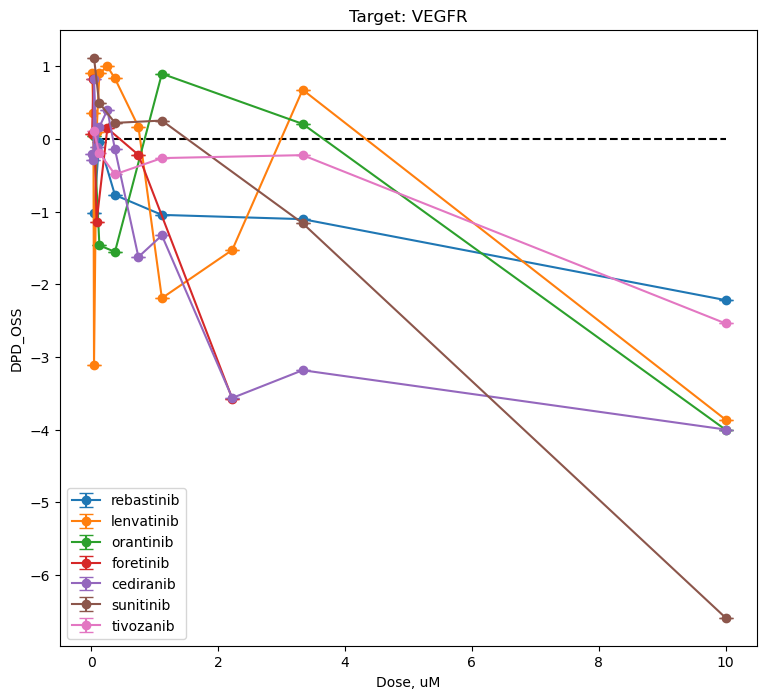

In [49]:
target_name = "VEGFR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [50]:
print_drugs += target_drugs

### PKC

In [51]:
target = "PRKC"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PRKC: 1 ['enzastaurin']


In [52]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
enzastaurin,PRKCB,"0.01 uM, 0.03 uM, 0.08 uM, 0.74 uM, 2.22 uM"


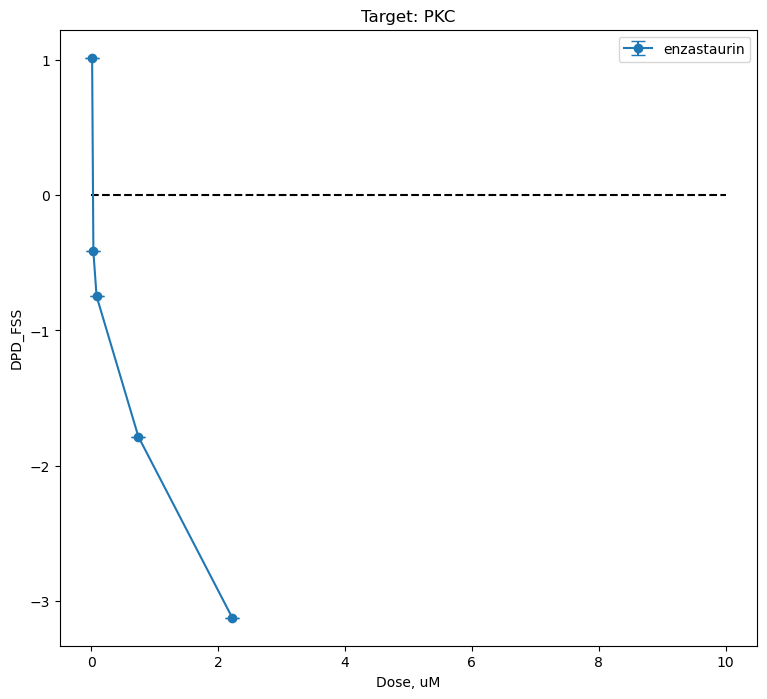

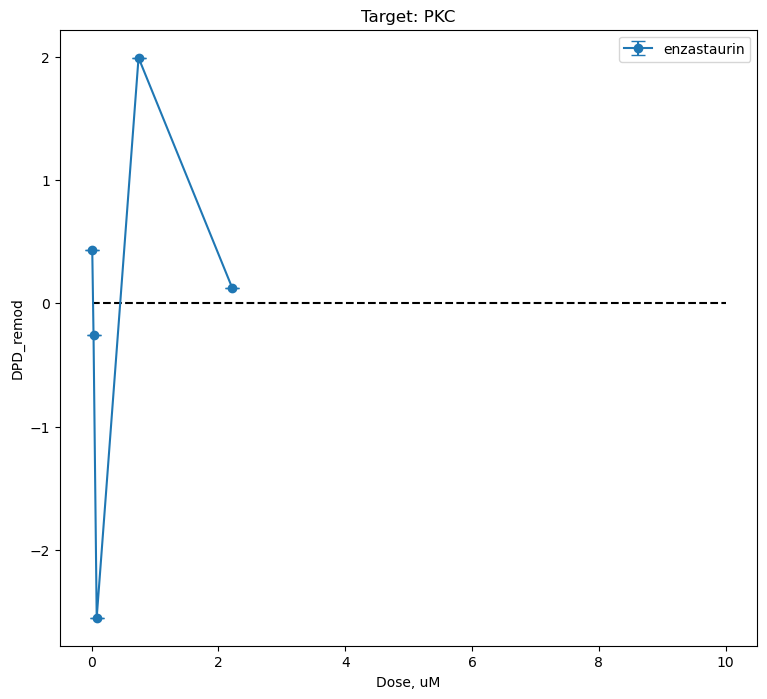

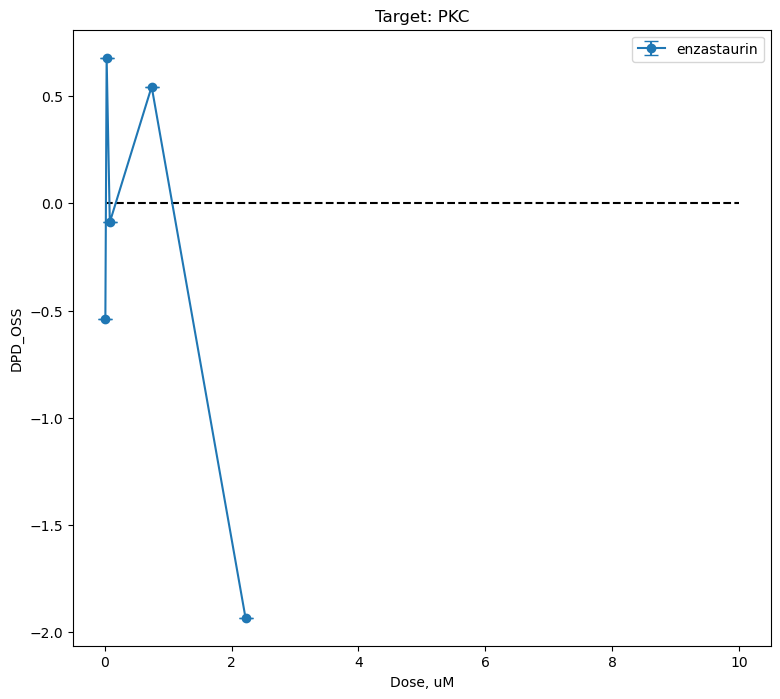

In [53]:
target_name = "PKC"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [54]:
print_drugs += target_drugs

### PTGS

In [55]:
target = "PTGS"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PTGS: 19 ['aminosalicylic-acid', 'amtolmetin-guacil', 'balsalazide', 'celecoxib', 'epirizole', 'etofenamate', 'indometacin', 'indoprofen', 'ketorolac', 'meloxicam', 'metamizole', 'naproxen', 'nepafenac', 'nimesulide', 'paracetamol', 'piroxicam', 'resveratrol', 'sasapyrine', 'voriconazole']


In [56]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
aminosalicylic-acid,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
amtolmetin-guacil,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
balsalazide,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
celecoxib,PTGS2,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
epirizole,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
etofenamate,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
indometacin,"PPARG, PTGDR2, PTGS1, PTGS2","0.04 uM, 0.37 uM, 1.11 uM, 10 uM, 3.33 uM"
indoprofen,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
ketorolac,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.08 uM, 0.125 uM, 0.25 uM, ..."
meloxicam,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."


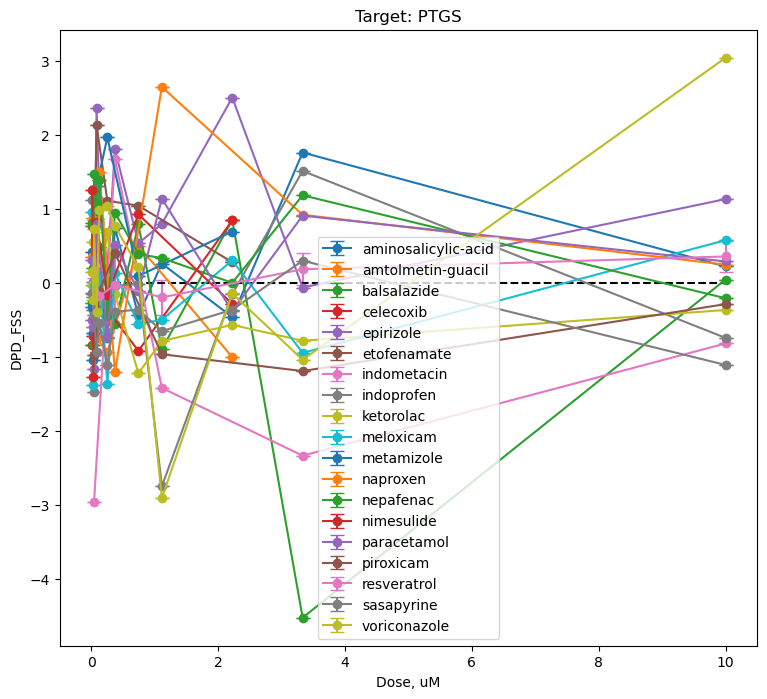

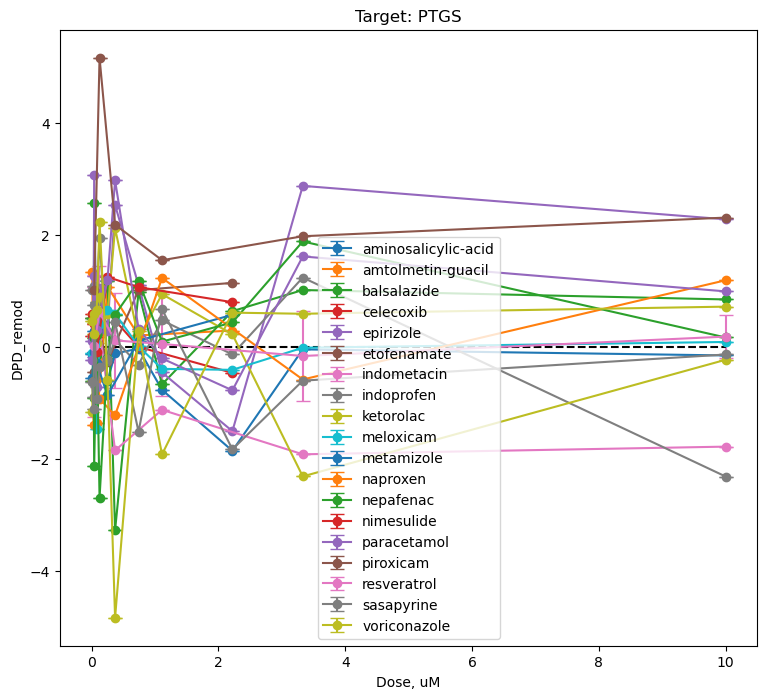

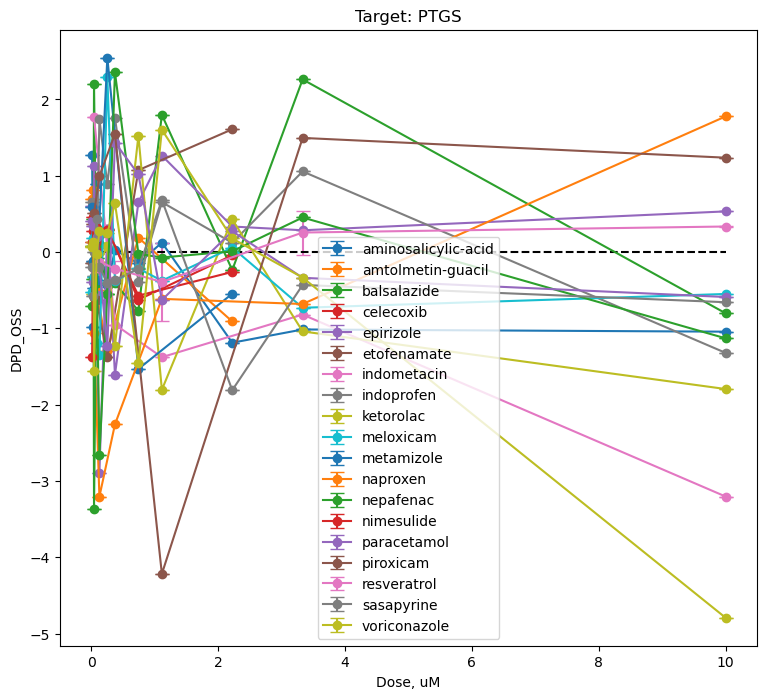

In [57]:
target_name = "PTGS"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [58]:
# delete module "PTGS"

### PSMB

In [59]:
target = "PSMB"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PSMB: 3 ['MG-132', 'bortezomib', 'ixazomib']


In [60]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
MG-132,PSMB1,20 uM
bortezomib,"PSMB1, PSMB2, PSMB5","0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 20..."
ixazomib,PSMB1,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM"


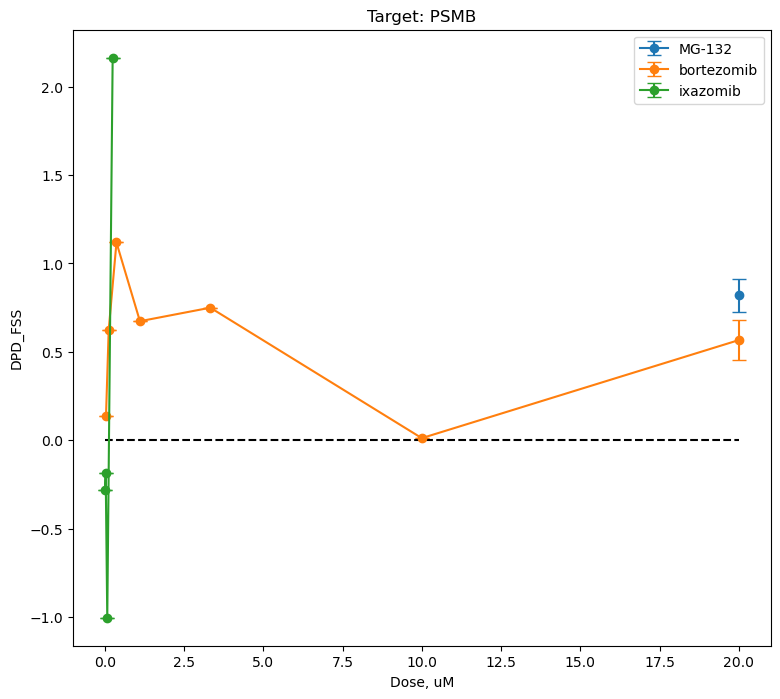

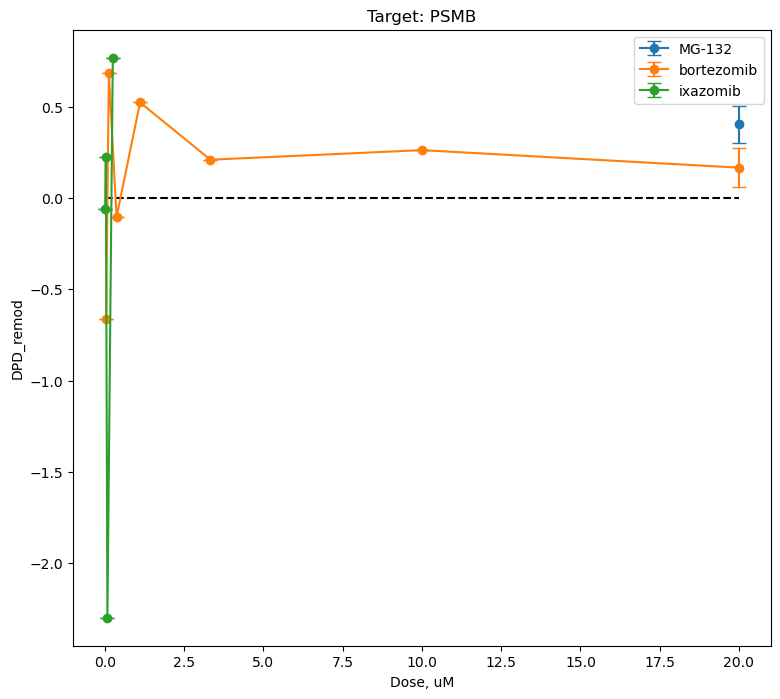

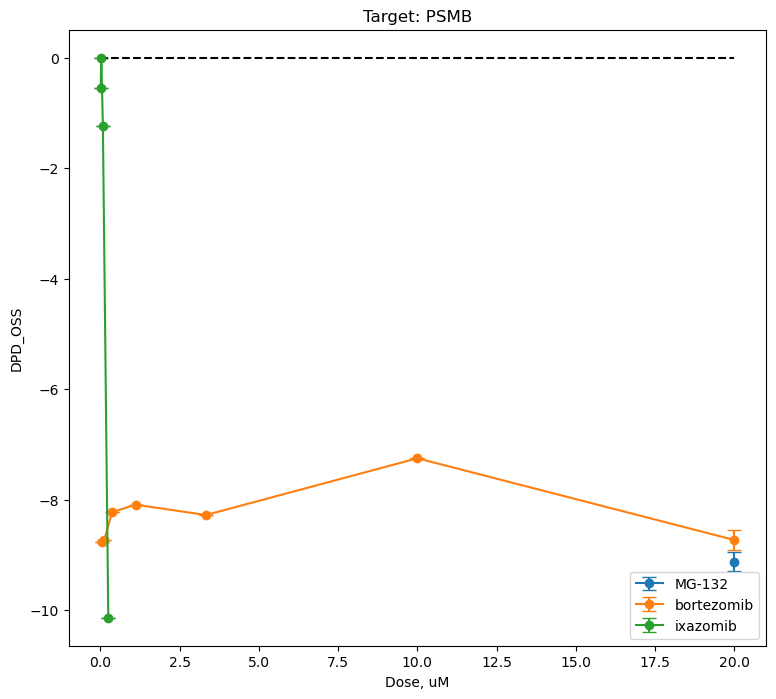

In [61]:
target_name = "PSMB"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,20], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [62]:
print_drugs += target_drugs

### GPBAR

In [63]:
target = "GPBAR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target GPBAR: 1 ['betulinic-acid']


In [64]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
betulinic-acid,GPBAR1,"0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."


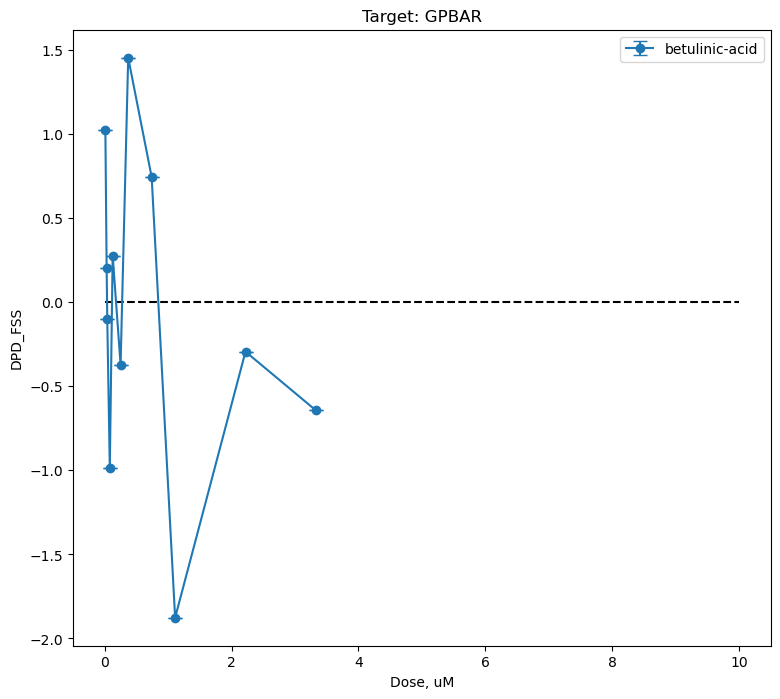

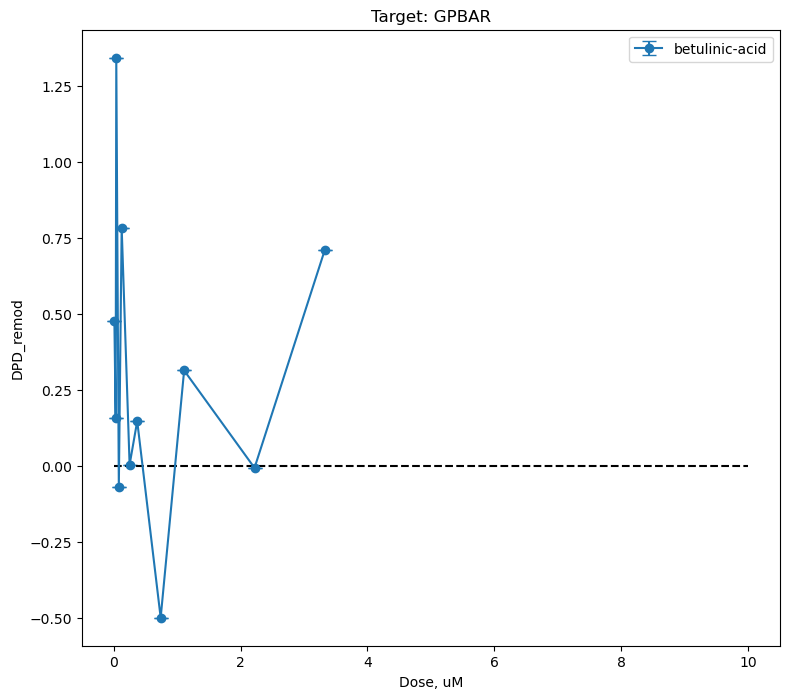

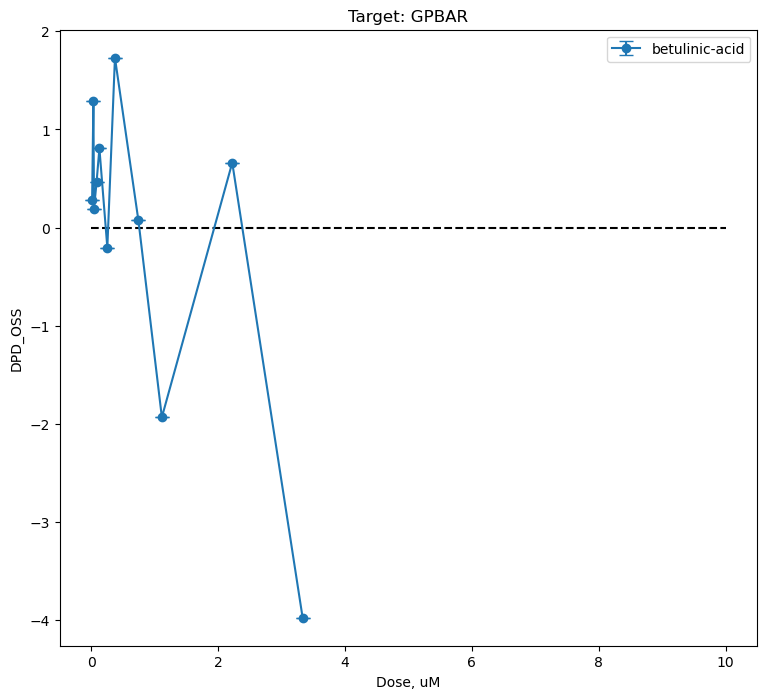

In [65]:
target_name = "GPBAR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [66]:
# delete module "GPBAR"

### PPARG

In [67]:
target = "PPARG"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PPARG: 6 ['balaglitazone', 'bezafibrate', 'ciglitazone', 'indometacin', 'mifobate', 'rosiglitazone']


In [68]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
balaglitazone,PPARG,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
bezafibrate,"PPARA, PPARD, PPARG","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
ciglitazone,PPARG,"0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."
indometacin,"PPARG, PTGDR2, PTGS1, PTGS2","0.04 uM, 0.37 uM, 1.11 uM, 10 uM, 3.33 uM"
mifobate,PPARG,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
rosiglitazone,PPARG,"0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."


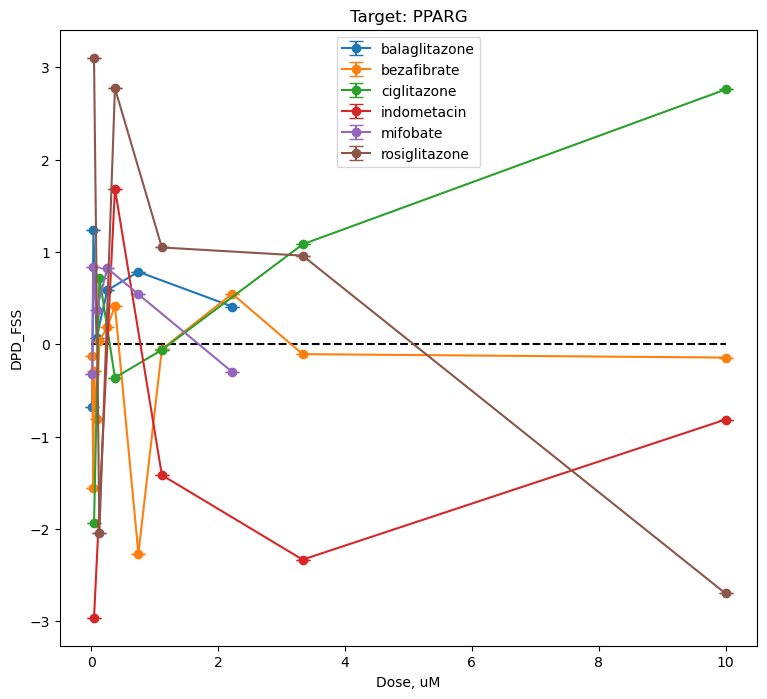

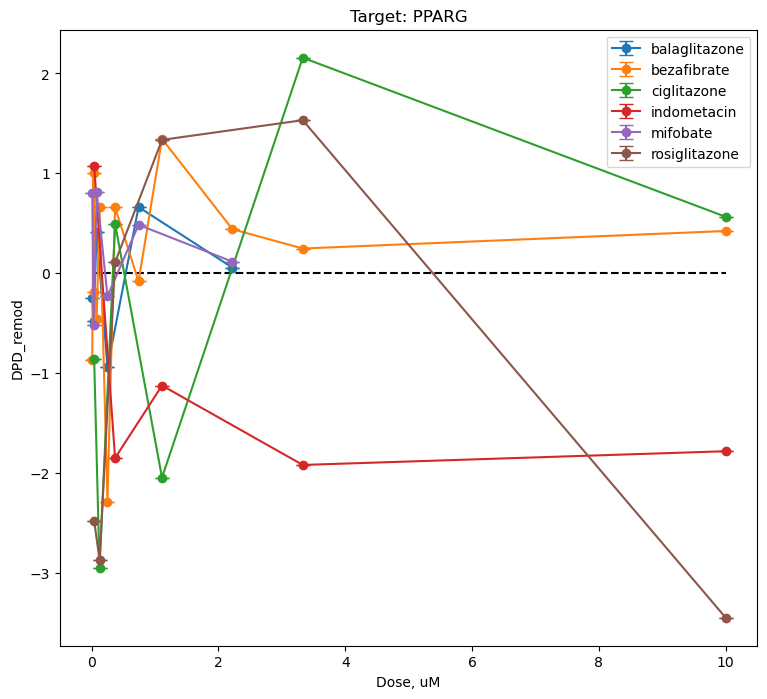

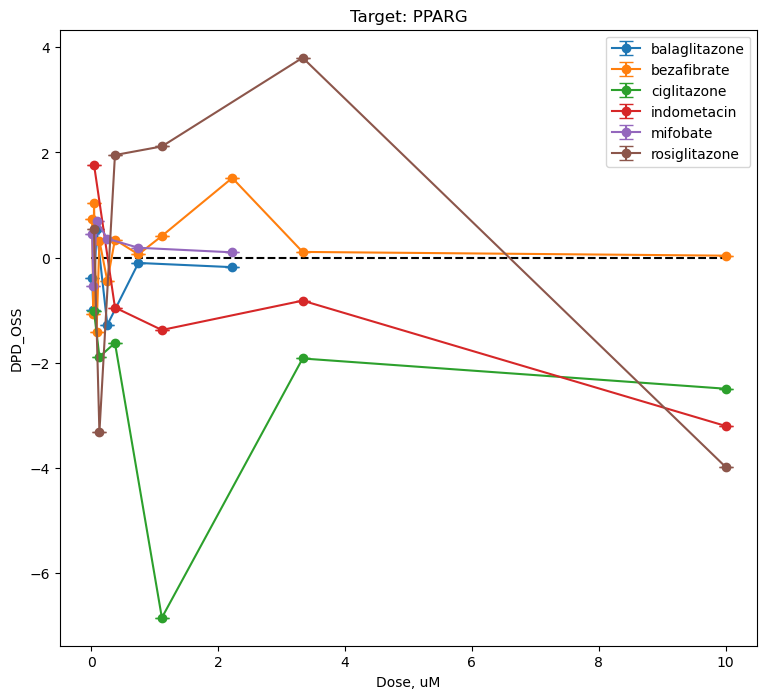

In [69]:
target_name = "PPARG"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [70]:
# delete module "PPARG"

In [71]:
print(print_drugs)

print_drugs_df = pd.DataFrame(print_drugs)
display(print_drugs_df)

print_drugs_df.to_excel("drugs.xlsx")

['CGP-60474', 'dinaciclib', 'PHA-767491', 'roscovitine', 'PF-03758309', 'PF-04691502', 'XL-147', 'GSK-2334470', 'A-66', 'BGT-226', 'BX-795', 'AZ-628', 'FR-180204', 'GDC-0879', 'GW-5074', 'PD-0325901', 'PD-184352', 'TAK-733', 'dabrafenib', 'refametinib', 'RAF-265', 'I-BET-762', 'I-BET-151', 'JQ-1-R', 'PFI-1', 'GSK-1070916', 'MLN-8054', 'ZM-447439', 'alisertib', 'SB-525334', 'rebastinib', 'lenvatinib', 'orantinib', 'foretinib', 'cediranib', 'sunitinib', 'tivozanib', 'enzastaurin', 'MG-132', 'bortezomib', 'ixazomib']


,0
0,CGP-60474
1,dinaciclib
2,PHA-767491
3,roscovitine
4,PF-03758309
5,PF-04691502
6,XL-147
7,GSK-2334470
8,A-66
9,BGT-226
